In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("train.csv")
df

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [3]:
allcolumns=df.columns
for item in allcolumns:
    print(item," ",df[item].nunique())

ACTION   2
RESOURCE   7518
MGR_ID   4243
ROLE_ROLLUP_1   128
ROLE_ROLLUP_2   177
ROLE_DEPTNAME   449
ROLE_TITLE   343
ROLE_FAMILY_DESC   2358
ROLE_FAMILY   67
ROLE_CODE   343


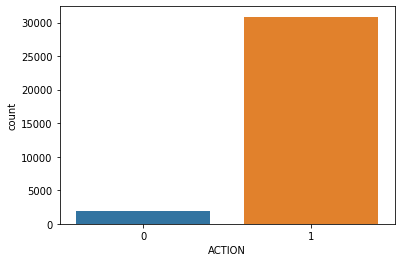

In [4]:
sns.countplot(df["ACTION"])

In [5]:
X=df.drop("ACTION",axis=1)
y=df["ACTION"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=27)

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictedvalues=lr.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,lr_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, lr_predictedvalues))

Accuracy:  0.9445868424264616
Confusion matrix: 
 [[   0  454]
 [   0 7739]]


In [8]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2) 
knn.fit(X_train, y_train)
knn_predictedvalues=knn.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,knn_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, knn_predictedvalues))

Accuracy:  0.9425119004027829
Confusion matrix: 
 [[  37  417]
 [  54 7685]]


In [9]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
dtc.fit(X_train, y_train)
dtc_predictedvalues=dtc.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,dtc_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, dtc_predictedvalues))

Accuracy:  0.9305504699133407
Confusion matrix: 
 [[ 191  263]
 [ 306 7433]]


In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predictedvalues=rfc.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,rfc_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, rfc_predictedvalues))

Accuracy:  0.9498352251922373
Confusion matrix: 
 [[ 172  282]
 [ 129 7610]]


Of all the modeForest Classifier shows better accuracy.